Dataset shape: (100000, 13)

Feature names: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level'] ...

Class distribution:
 diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64

Starting model comparison...

Training Logistic Regression...
Logistic Regression CV Score (mean): 0.9605 (+/- 0.0012)
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



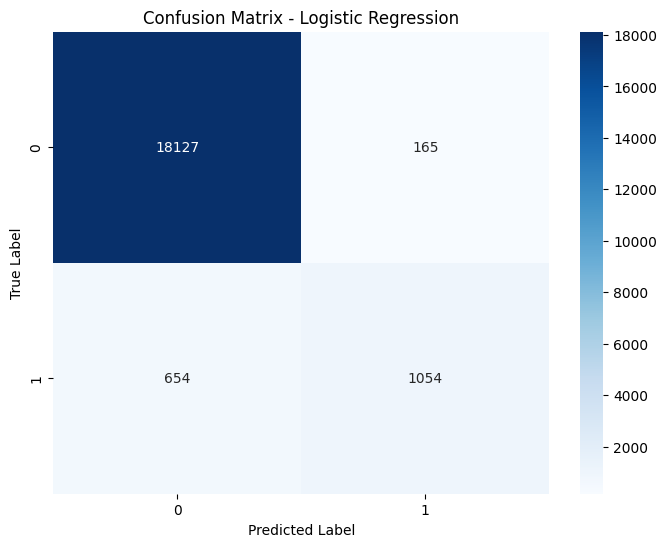


Training Random Forest...
Random Forest CV Score (mean): 0.9703 (+/- 0.0006)
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



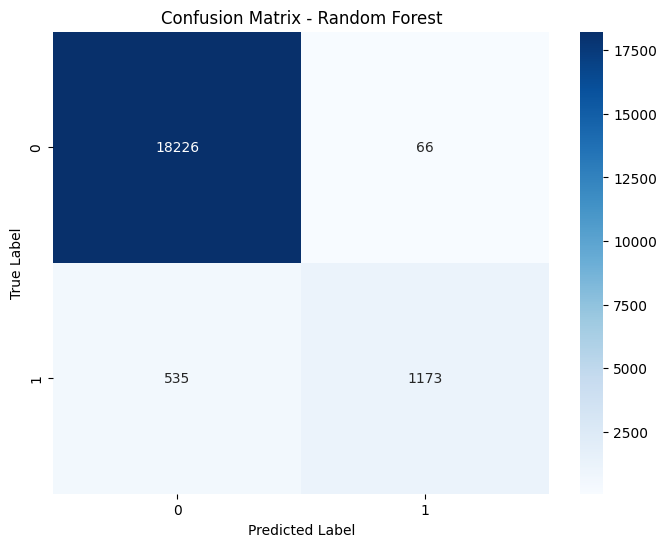


Training Gradient Boosting...
Gradient Boosting CV Score (mean): 0.9719 (+/- 0.0010)
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



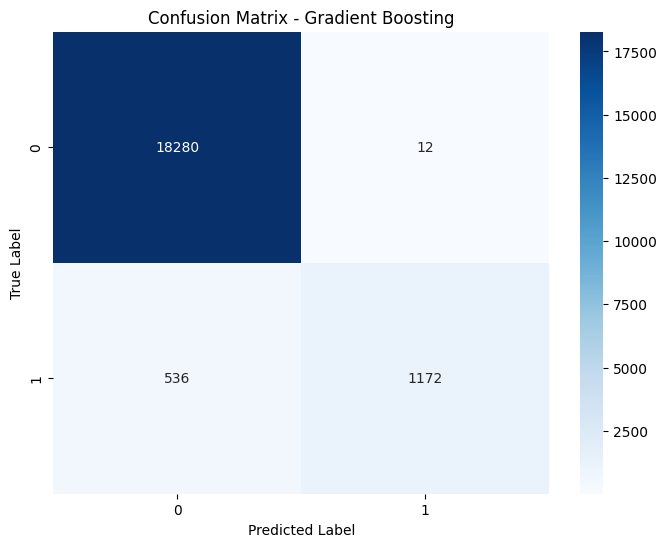


Training SVM...
SVM CV Score (mean): 0.9628 (+/- 0.0018)
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.97      0.56      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.97      0.78      0.85     20000
weighted avg       0.96      0.96      0.96     20000



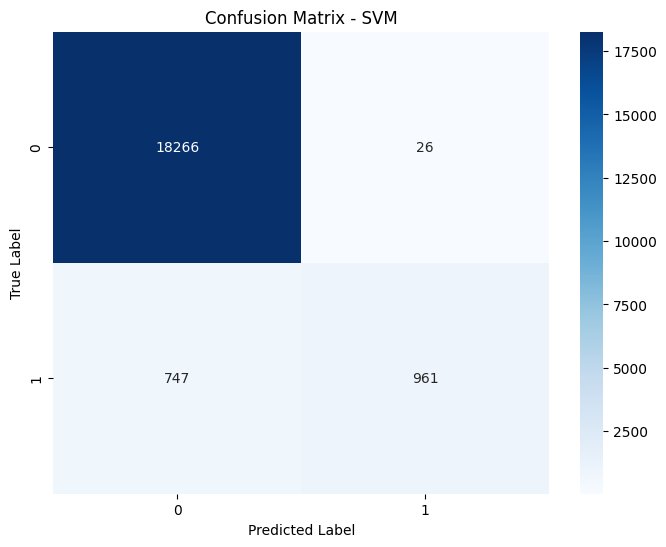

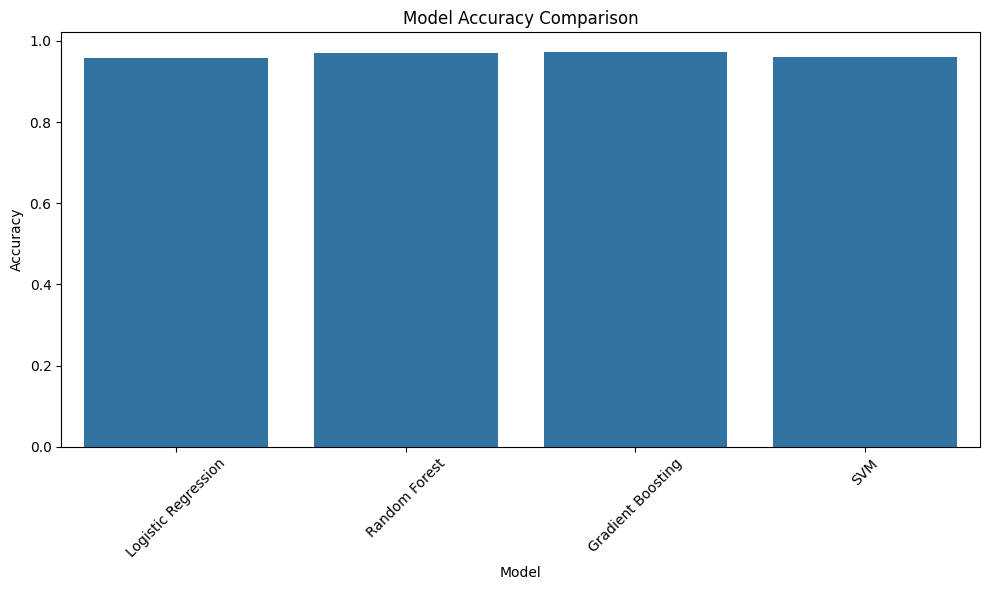

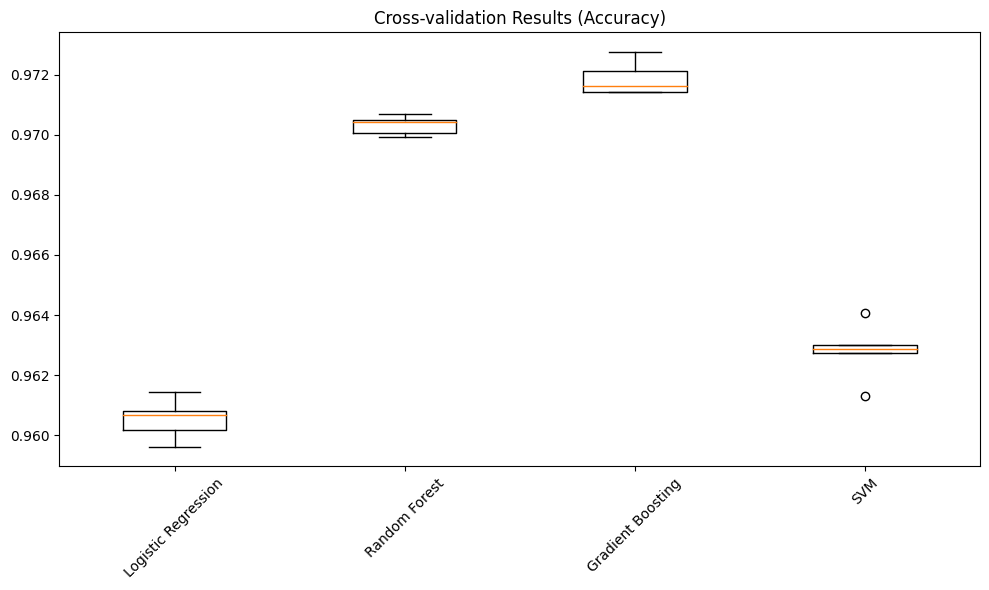


Analyzing feature importance...

Feature importance for Random Forest:


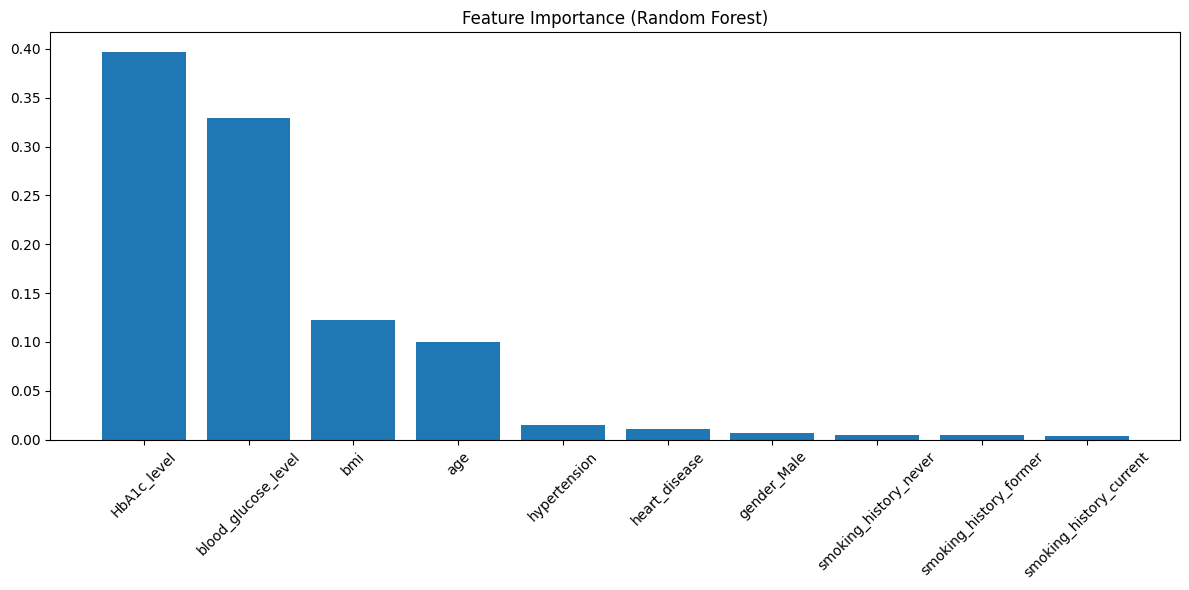


Top 10 most important features:
                    Feature  Importance
4               HbA1c_level    0.397138
5       blood_glucose_level    0.329611
3                       bmi    0.121995
0                       age    0.100404
1              hypertension    0.014600
2             heart_disease    0.010685
6               gender_Male    0.007010
11    smoking_history_never    0.005169
10   smoking_history_former    0.004357
8   smoking_history_current    0.003233

Feature importance for Gradient Boosting:


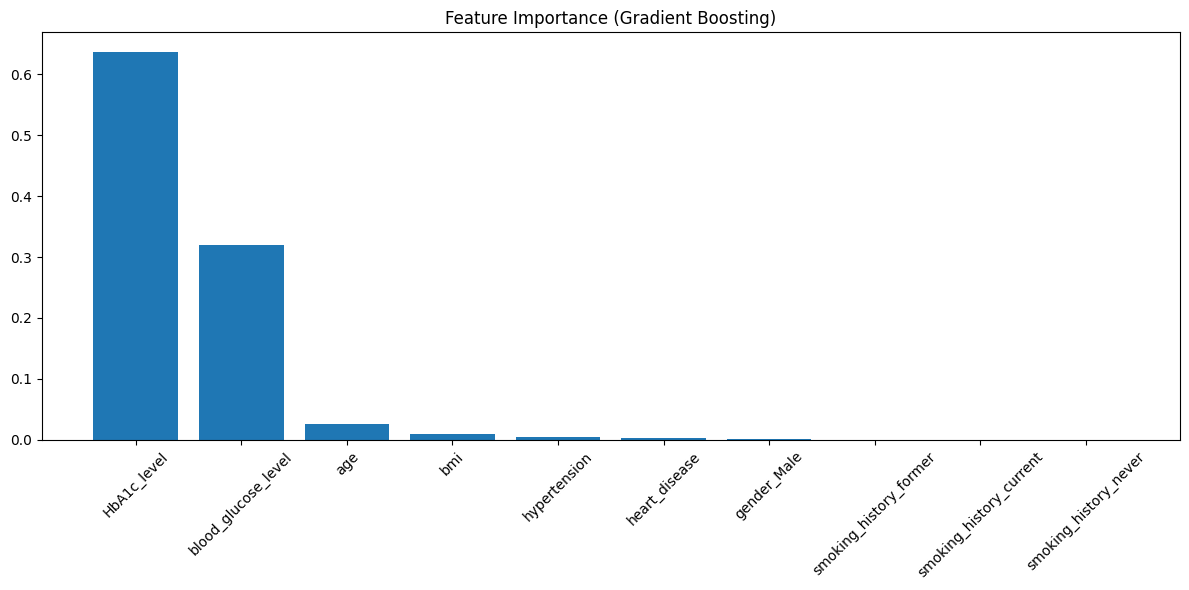


Top 10 most important features:
                    Feature  Importance
4               HbA1c_level    0.637313
5       blood_glucose_level    0.319906
0                       age    0.025486
3                       bmi    0.009921
1              hypertension    0.004075
2             heart_disease    0.002551
6               gender_Male    0.000225
10   smoking_history_former    0.000165
8   smoking_history_current    0.000135
11    smoking_history_never    0.000101


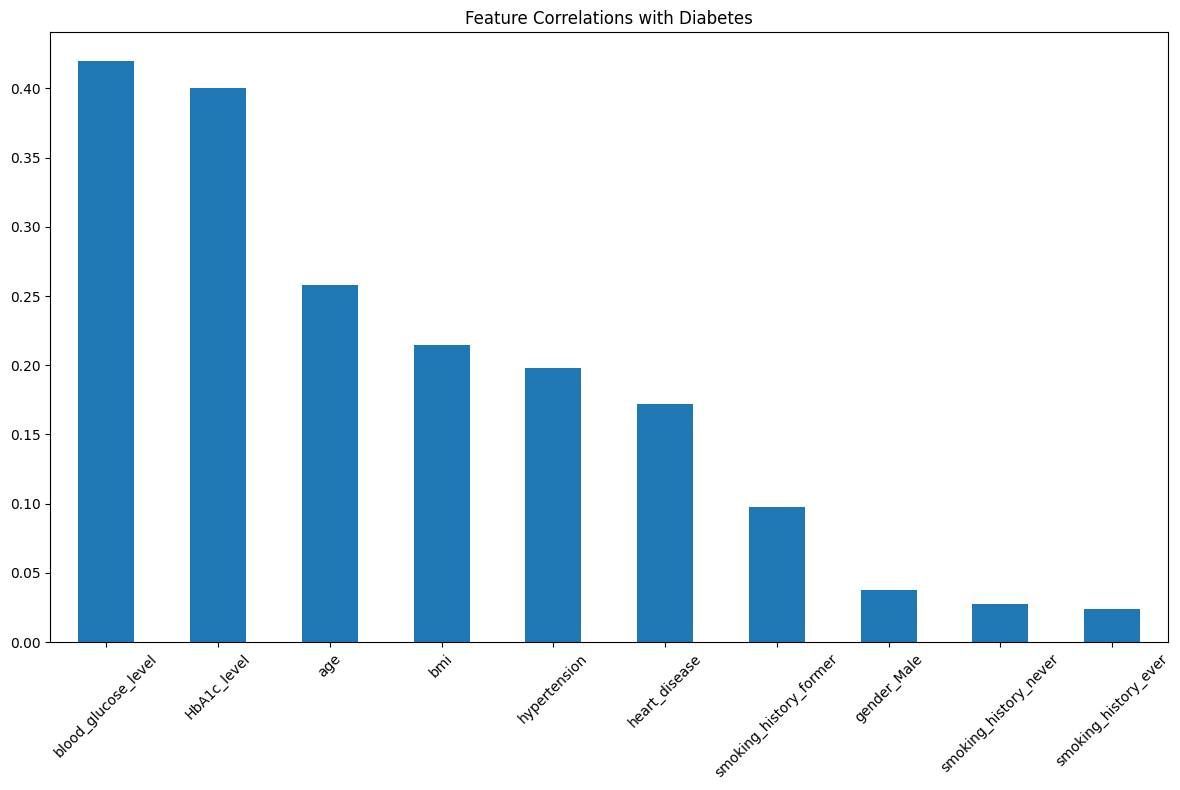


Model Performance Summary:
                 Model  Accuracy
0  Logistic Regression   0.95905
1        Random Forest   0.96995
2    Gradient Boosting   0.97260
3                  SVM   0.96135

Cross-validation Scores (mean ± std):
Logistic Regression: 0.9605 ± 0.0012
Random Forest: 0.9703 ± 0.0006
Gradient Boosting: 0.9719 ± 0.0010
SVM: 0.9628 ± 0.0018


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_true, y_pred, model_name):
    """Evaluate model performance using classification metrics"""
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

def compare_models(X, y):
    """Compare different classification models"""
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define models for classification
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='rbf', random_state=42)
    }

    results = []
    cv_scores = {}
    trained_models = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train_scaled, y_train)
        trained_models[name] = model

        y_pred = model.predict(X_test_scaled)
        metrics = evaluate_model(y_test, y_pred, name)
        results.append({
            'Model': name,
            'Accuracy': metrics['Accuracy']
        })

        # Perform cross-validation
        cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        cv_scores[name] = cv_score
        print(f"{name} CV Score (mean): {cv_score.mean():.4f} (+/- {cv_score.std() * 2:.4f})")
        print(f"Classification Report:\n{metrics['Classification Report']}")

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    results_df = pd.DataFrame(results)

    # Plot model accuracies
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Accuracy', data=results_df)
    plt.title('Model Accuracy Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot cross-validation results
    plt.figure(figsize=(10, 6))
    plt.boxplot([cv_scores[model] for model in models.keys()], labels=models.keys())
    plt.title('Cross-validation Results (Accuracy)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return results_df, cv_scores, trained_models

def plot_feature_importance(model, feature_names, model_name):
    """Plot feature importance for tree-based models"""
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(12, 6))
        plt.title(f'Feature Importance ({model_name})')
        plt.bar(range(10), importances[indices][:10])  # Show top 10 features
        plt.xticks(range(10), [feature_names[i] for i in indices][:10], rotation=45)
        plt.tight_layout()
        plt.show()

        # Return feature importance DataFrame
        return pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)

# Using your existing preprocessed data
print("Dataset shape:", X.shape)
print("\nFeature names:", X.columns.tolist()[:5], "...")  # Show first 5 features
print("\nClass distribution:\n", y.value_counts(normalize=True))

# Run the model comparison
print("\nStarting model comparison...")
results_df, cv_scores, trained_models = compare_models(X, y)

# Plot feature importance for tree-based models
print("\nAnalyzing feature importance...")
feature_names = X.columns.tolist()
importance_dfs = {}
for model_name in ['Random Forest', 'Gradient Boosting']:
    print(f"\nFeature importance for {model_name}:")
    importance_df = plot_feature_importance(trained_models[model_name], feature_names, model_name)
    importance_dfs[model_name] = importance_df
    print("\nTop 10 most important features:")
    print(importance_df.head(10))

# Feature correlation analysis
plt.figure(figsize=(12, 8))
correlation_matrix = pd.concat([X, pd.Series(y, name='diabetes')], axis=1).corr()['diabetes'].sort_values(ascending=False)
plt.title('Feature Correlations with Diabetes')
correlation_matrix[1:11].plot(kind='bar')  # Excluding diabetes itself and showing top 10
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nModel Performance Summary:")
print(results_df)

# Print average cross-validation scores
print("\nCross-validation Scores (mean ± std):")
for model_name, scores in cv_scores.items():
    print(f"{model_name}: {scores.mean():.4f} ± {scores.std() * 2:.4f}")

Starting hybrid model evaluation...

Evaluating Random Forest...

Evaluating Gradient Boosting...

Evaluating Hybrid (RF:0.3, GB:0.7)...


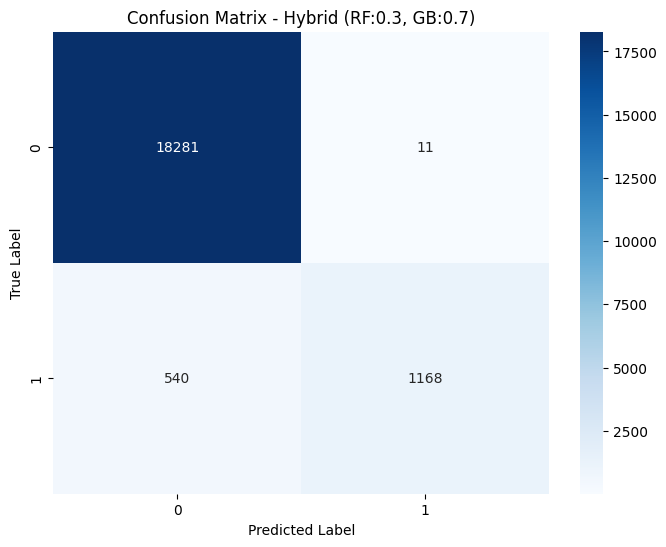

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000


Evaluating Hybrid (RF:0.5, GB:0.5)...


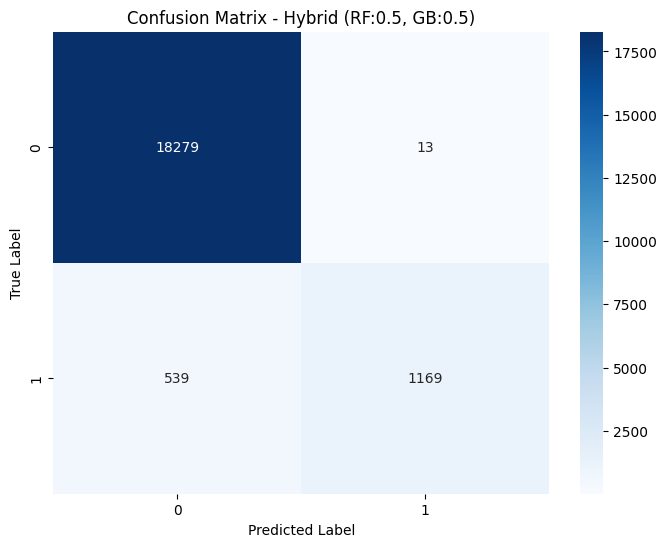

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000


Evaluating Hybrid (RF:0.7, GB:0.3)...


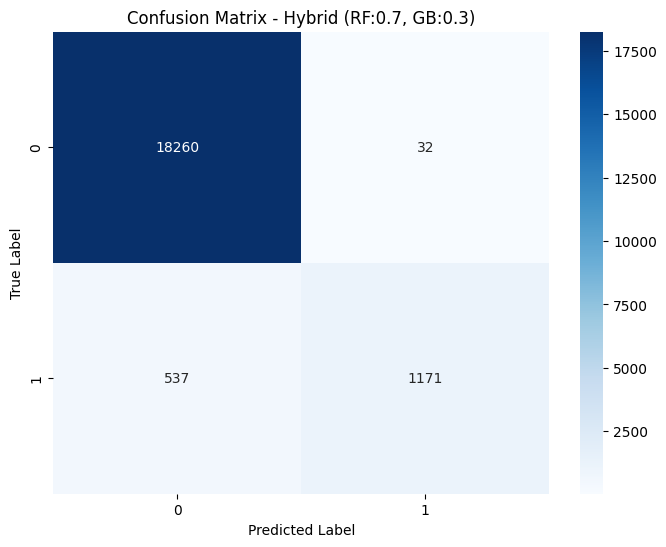

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.97      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



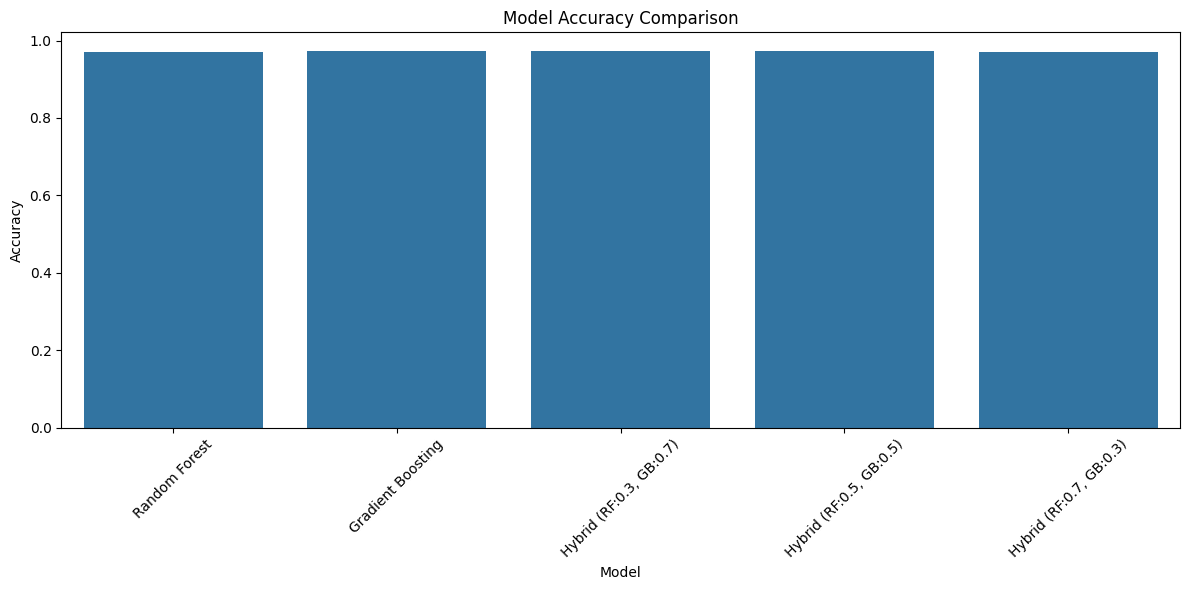

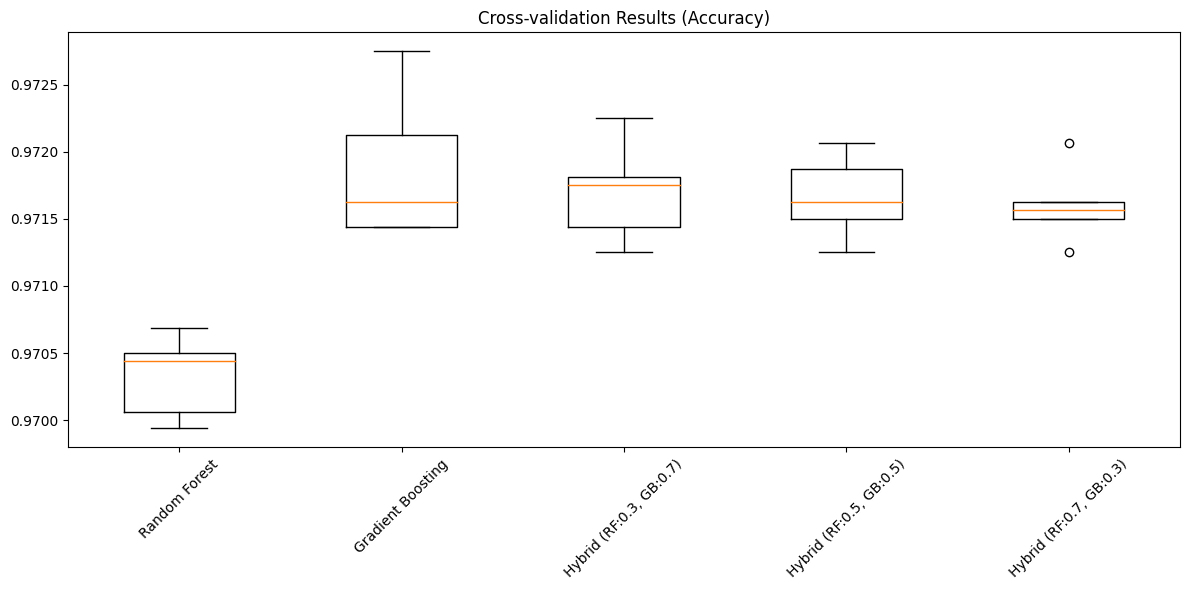


Final Results Summary:
                  Model  Accuracy  CV Score Mean  CV Score Std
          Random Forest   0.96995       0.970325      0.000281
      Gradient Boosting   0.97260       0.971875      0.000505
Hybrid (RF:0.3, GB:0.7)   0.97245       0.971700      0.000343
Hybrid (RF:0.5, GB:0.5)   0.97240       0.971663      0.000284
Hybrid (RF:0.7, GB:0.3)   0.97155       0.971600      0.000264

Feature Importance Analysis for Best Hybrid Model:

Top 10 Most Important Features (Weighted):
                    Feature  RF_Importance  GB_Importance  Weighted_Importance
4               HbA1c_level       0.397138       0.637313             0.565260
5       blood_glucose_level       0.329611       0.319906             0.322817
0                       age       0.100404       0.025486             0.047962
3                       bmi       0.121995       0.009921             0.043544
1              hypertension       0.014600       0.004075             0.007232
2             heart_disease 

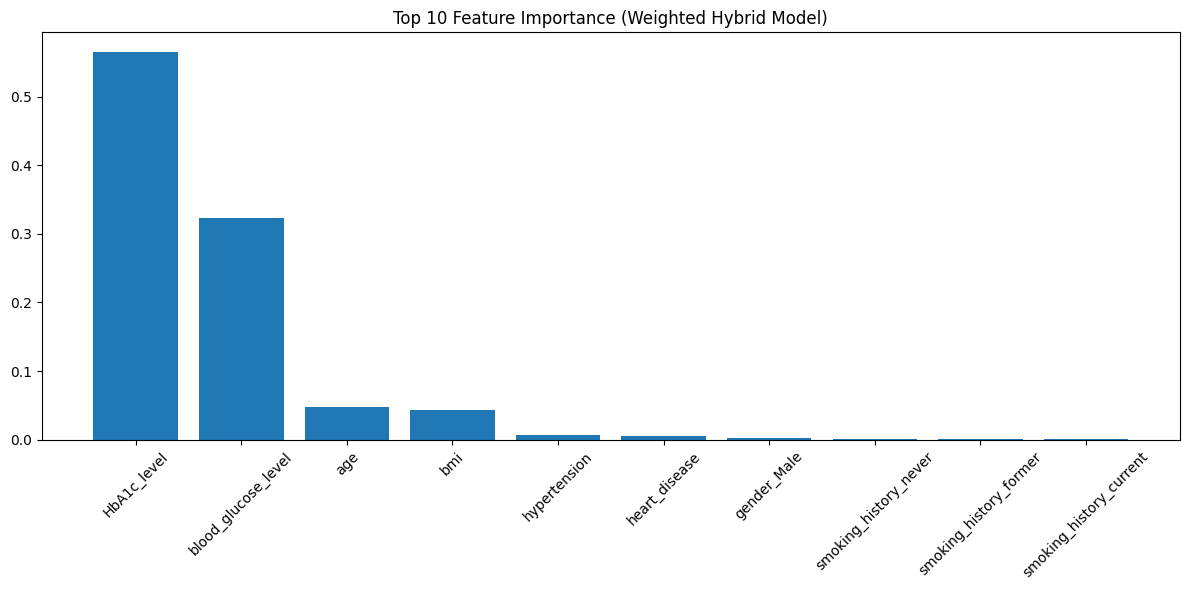

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class HybridForestBoostingClassifier(BaseEstimator, ClassifierMixin):
    """
    A hybrid classifier that combines Random Forest and Gradient Boosting predictions
    using weighted voting.
    """
    def __init__(self, rf_weight=0.5, n_estimators=100, random_state=42):
        self.rf_weight = rf_weight
        self.gb_weight = 1 - rf_weight
        self.n_estimators = n_estimators
        self.random_state = random_state

        self.rf_model = RandomForestClassifier(
            n_estimators=n_estimators,
            random_state=random_state
        )
        self.gb_model = GradientBoostingClassifier(
            n_estimators=n_estimators,
            random_state=random_state
        )

    def fit(self, X, y):
        """Train both models on the input data"""
        # Store unique classes for predict_proba
        self.classes_ = np.unique(y)

        self.rf_model.fit(X, y)
        self.gb_model.fit(X, y)
        return self

    def predict_proba(self, X):
        """
        Combine probability predictions from both models using weighted average
        """
        rf_proba = self.rf_model.predict_proba(X)
        gb_proba = self.gb_model.predict_proba(X)
        return self.rf_weight * rf_proba + self.gb_weight * gb_proba

    def predict(self, X):
        """
        Make predictions using the weighted probability combinations
        """
        combined_proba = self.predict_proba(X)
        return self.classes_[np.argmax(combined_proba, axis=1)]

    def predict(self, X):
        """
        Make predictions using the weighted probability combinations
        """
        combined_proba = self.predict_proba(X)
        return np.argmax(combined_proba, axis=1)

def evaluate_hybrid_model(X, y, rf_weights=[0.3, 0.5, 0.7]):
    """
    Evaluate the hybrid model with different weights and compare to base models
    """
    # Split and scale the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Results storage
    results = []
    cv_scores = {}
    best_model = None
    best_accuracy = 0

    # Train and evaluate base models
    base_models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
    }

    for name, model in base_models.items():
        print(f"\nEvaluating {name}...")
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'CV Score Mean': cv_score.mean(),
            'CV Score Std': cv_score.std()
        })
        cv_scores[name] = cv_score

    # Evaluate hybrid models with different weights
    for rf_weight in rf_weights:
        model_name = f'Hybrid (RF:{rf_weight:.1f}, GB:{1-rf_weight:.1f})'
        print(f"\nEvaluating {model_name}...")

        hybrid_model = HybridForestBoostingClassifier(rf_weight=rf_weight)
        hybrid_model.fit(X_train_scaled, y_train)
        y_pred = hybrid_model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        cv_score = cross_val_score(hybrid_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'CV Score Mean': cv_score.mean(),
            'CV Score Std': cv_score.std()
        })
        cv_scores[model_name] = cv_score

        # Track best performing model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = hybrid_model

        # Plot confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Create results DataFrame
    results_df = pd.DataFrame(results)

    # Plot model comparisons
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Accuracy', data=results_df)
    plt.title('Model Accuracy Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot cross-validation results
    plt.figure(figsize=(12, 6))
    plt.boxplot([cv_scores[model] for model in results_df['Model']],
                labels=results_df['Model'])
    plt.title('Cross-validation Results (Accuracy)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return results_df, cv_scores, best_model

# Example usage:
print("Starting hybrid model evaluation...")
results_df, cv_scores, best_hybrid_model = evaluate_hybrid_model(X, y)

# Print final results
print("\nFinal Results Summary:")
print(results_df.to_string(index=False))

# Feature importance analysis for the best hybrid model
print("\nFeature Importance Analysis for Best Hybrid Model:")
feature_names = X.columns.tolist()

# Get feature importance from both base models in the hybrid
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'RF_Importance': best_hybrid_model.rf_model.feature_importances_
})

gb_importance = pd.DataFrame({
    'Feature': feature_names,
    'GB_Importance': best_hybrid_model.gb_model.feature_importances_
})

# Combine and calculate weighted importance
combined_importance = rf_importance.merge(gb_importance, on='Feature')
combined_importance['Weighted_Importance'] = (
    combined_importance['RF_Importance'] * best_hybrid_model.rf_weight +
    combined_importance['GB_Importance'] * best_hybrid_model.gb_weight
)

# Sort and display top features
combined_importance = combined_importance.sort_values('Weighted_Importance', ascending=False)
print("\nTop 10 Most Important Features (Weighted):")
print(combined_importance.head(10))

# Plot weighted feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(10), combined_importance['Weighted_Importance'].head(10))
plt.title('Top 10 Feature Importance (Weighted Hybrid Model)')
plt.xticks(range(10), combined_importance['Feature'].head(10), rotation=45)
plt.tight_layout()
plt.show()